In [1]:
# K Nearest Neighbors KNN
# output is a class membership, assigned to the class based on its k nearest neighbors
# KNN calculates the distance to find K nearest neighbors, then votes for the class
# input is the K value itself
# KNN performs better with lower number of features rather than a large number of features (overfitting, data)
# choose K as an odd number if # of classes is even
# Elbow Method is imagine: x axis is # of clusters and y axis is % explained, you want to choose x for high explanatory power, 
#       but choose x such that, if you add 1 more cluster, it doesn't give much better explain (next marginal benefit is lower)
#       https://en.wikipedia.org/wiki/Elbow_method_(clustering)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


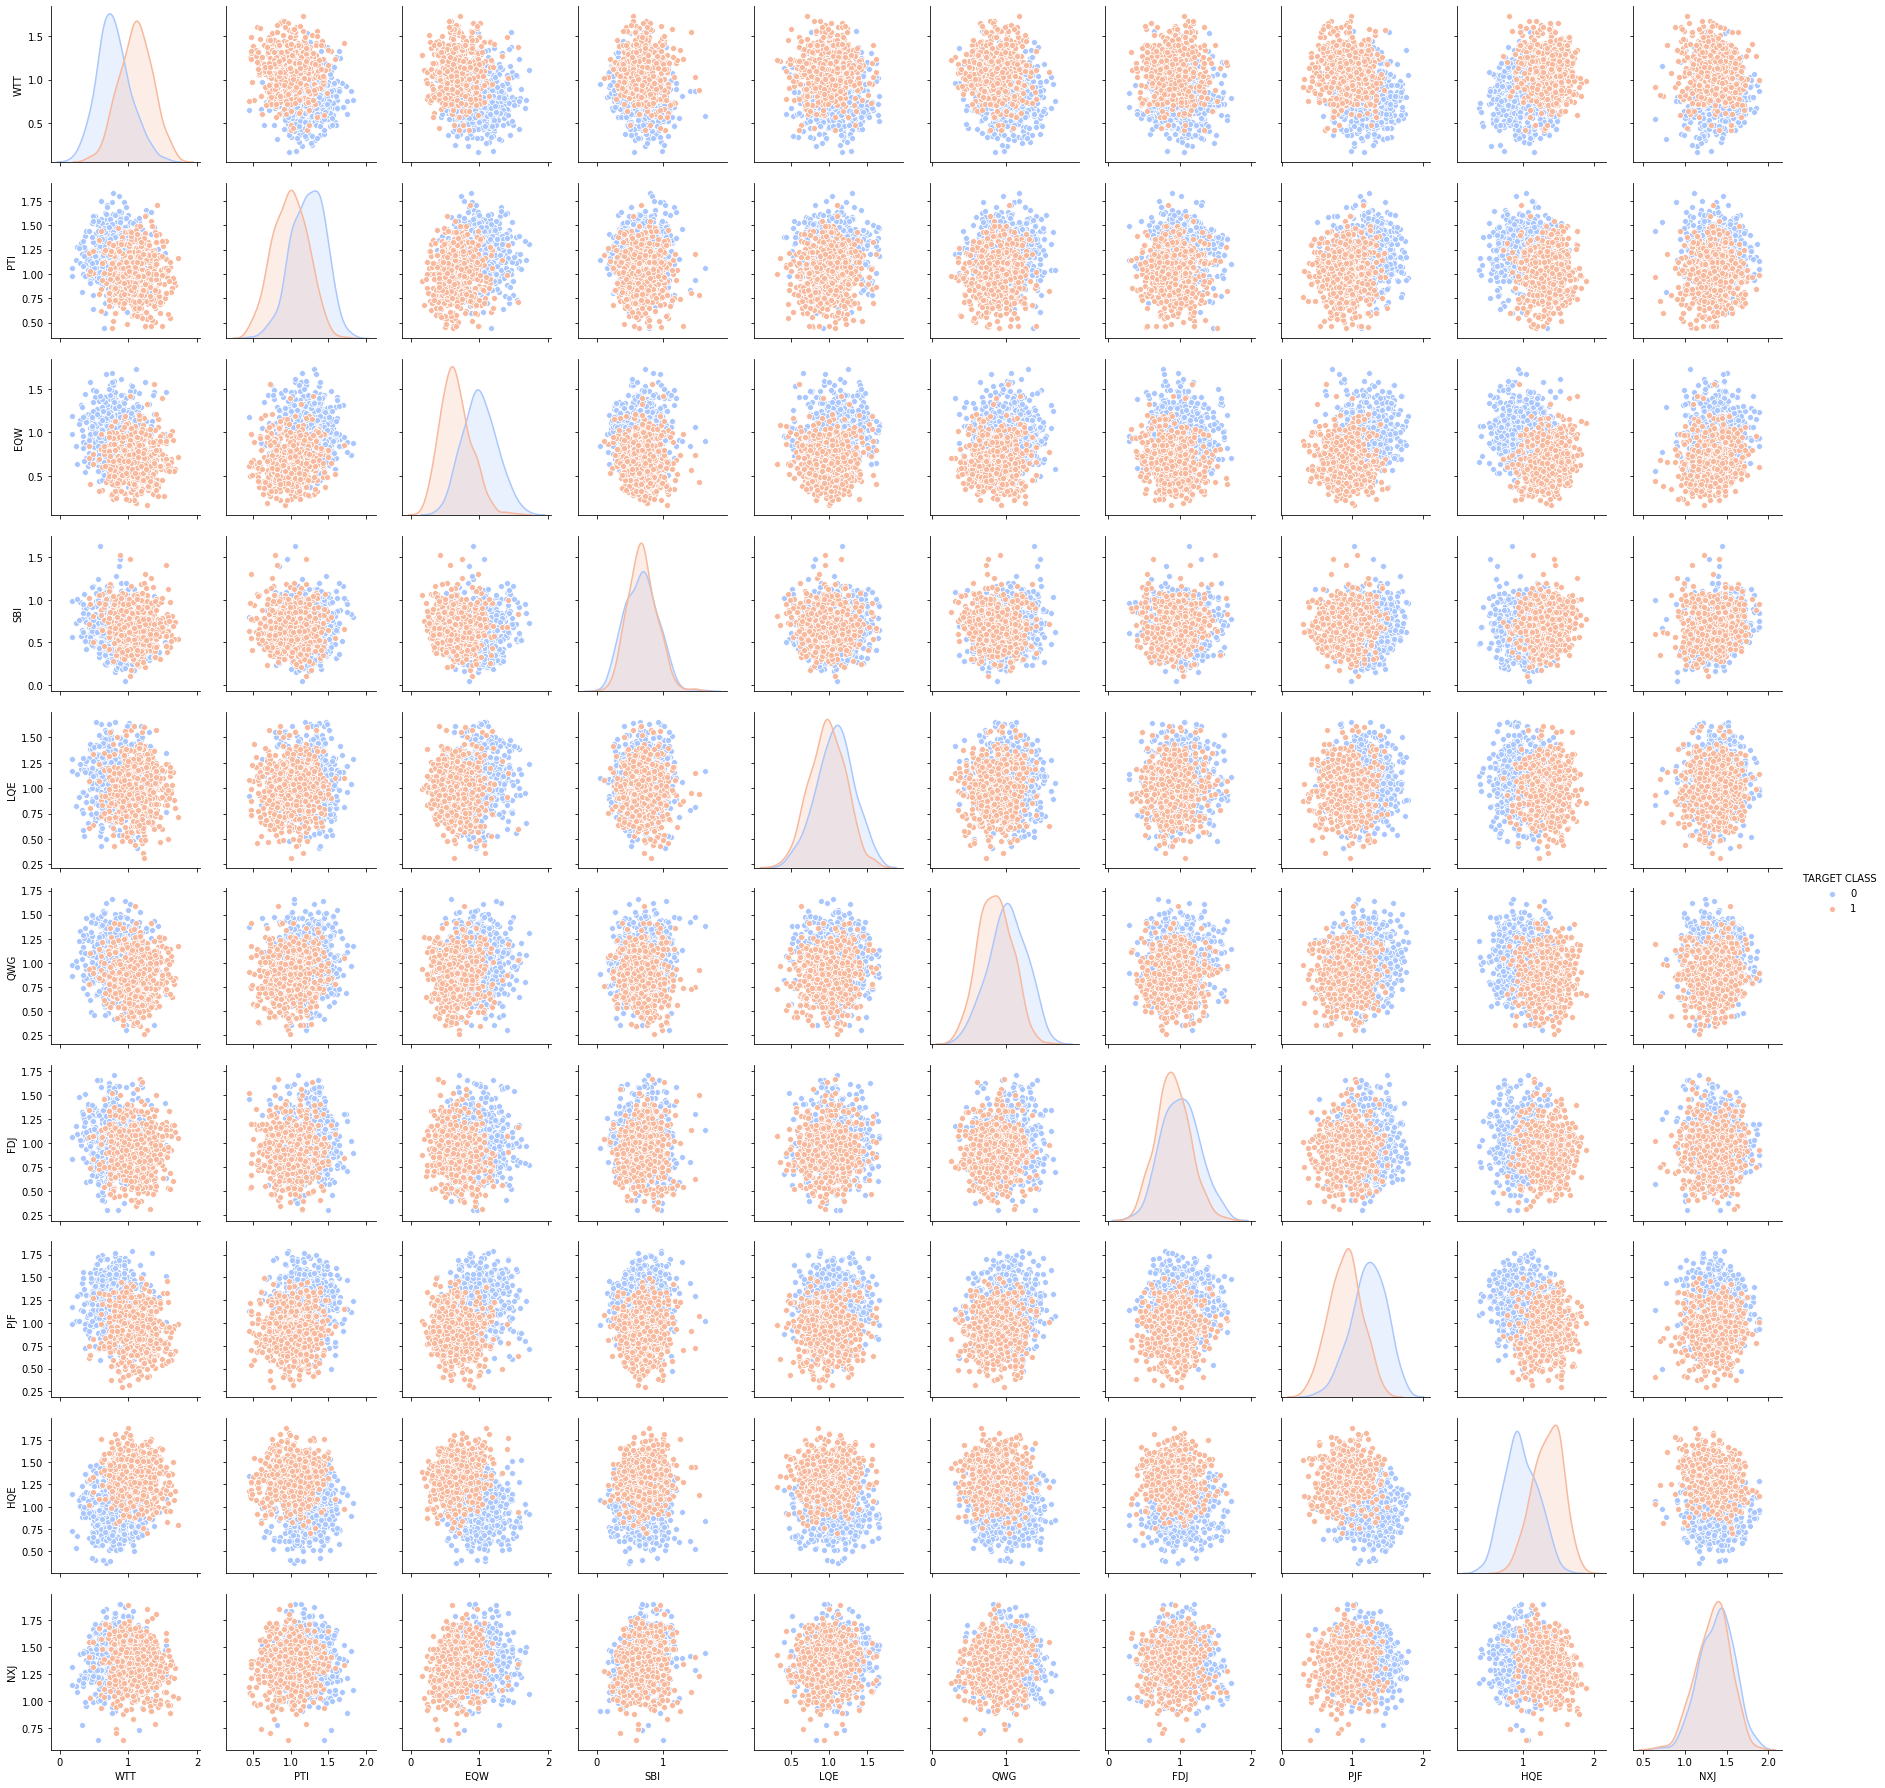

In [3]:
# visualize the elationships
# assuming the last column is Target Class, ignore it
sns.pairplot(df,vars = df.columns[:-1], hue='TARGET CLASS', 
             palette='coolwarm') # visually look for good separation (which columns? then pairplot just the column)

In [4]:
# if needed, fill in the missing data gaps

"""
if (df.isnull().sum()>0):
    # fill missing values in WTT
    mean = df['WTT'].mean() # imputing WTT with mean
    df['WTT'].fillna(mean, inplace = True)

    mode = df['PTI'].mode() #imputing PTI with mode
    df['PTI'].fillna(mode[0], inplace = True)
"""

# look for anything > 1:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [5]:
# KNN uses distance, so magnitude and scale matters a lot, must standardize

# drop any item ID or nonsense data
#df.drop(['badcolumn'], axis=1, inplace=True)

# convert categorical variables if needed, see logistic regression section
# df=pd.get_dummies(df)

# scale the units
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

# perform a standardization to transform it
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_features

# create a new standardized/scaled dataframe 
# for columns, exclude last column = TARGET CLASS (df.columns[:-1])
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [6]:
# another scaling algorithm: minmax 
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_features2 = scaler2.fit_transform(df.drop('TARGET CLASS', axis=1))
df_feat2 = pd.DataFrame(scaled_features2, columns=df.columns[:-1])
df_feat2.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463


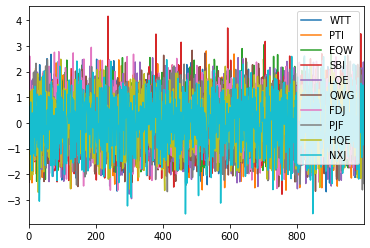

In [7]:
df_feat.plot()

In [8]:
# X = scaled_features # this does not have columns
X = df_feat
y = df['TARGET CLASS']

# shuffle the data to prevent localized concentrations of data with a certain magnitude/order
from sklearn.utils import shuffle
seed = 42
X, y = shuffle(X, y, random_state=seed)

# run the training set vs test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
946,-0.524056,1.036017,0.726959,1.540616,0.252459,1.532026,2.233868,0.606745,0.600957,0.583952
689,-0.335432,0.796209,-1.643095,-0.672131,0.672657,1.147259,0.404617,-0.721811,0.609405,-1.380059
42,1.112352,-0.709908,-0.207542,-0.701413,0.223241,1.013728,0.543585,-0.524098,0.096255,1.825454
8,-0.598054,1.360189,-0.172618,-1.502292,-1.192485,0.504787,-0.325981,0.834346,-0.136536,-0.670199
64,1.628502,0.854675,0.011388,-0.983300,0.079763,-0.010238,-0.536043,-0.797364,0.501518,0.596119
...,...,...,...,...,...,...,...,...,...,...
927,-0.051497,-0.809913,-0.552072,-1.638956,0.043812,-1.615296,-0.313731,0.774973,0.206753,-0.976952
612,-0.280656,2.682248,-0.336455,0.660139,0.037221,0.077525,0.231290,0.158866,-0.892640,0.475924
547,1.041681,-1.516302,-0.591582,-0.685928,-1.106424,0.647034,0.843475,-0.237081,-0.709921,1.391490
340,-0.137125,0.790502,-0.159840,-1.179898,-0.460344,-1.454689,-0.309364,0.172234,-0.763284,0.799835


In [9]:
# KNN = K nearest number of neighbors model
# 1) calculate the distance between the new point and each prior training point
# 2) add the distances to an ordered collection: k_nearest_distance_indices = sorted_neighbor_distances_and_indices[:k]
# 3) sort the ordered collection from smallest to largest and pick first K entries
# 4) Get labels from the first K entries
# 5) If regression, return the mean of K labels
# 6) If classification, return the mode of the K labels

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [10]:
# create a prediction
pred = knn.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], d

In [11]:
# on the results, run a classification report and a confusion matrix to see how good the model is
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\nClassification Matrix: ')
print(classification_report(y_test,pred))

Confusion Matrix: 
[[142  18]
 [ 14 126]]

Classification Matrix: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.88      0.90      0.89       140

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



Text(0, 0.5, 'Error Rate - lower is better')

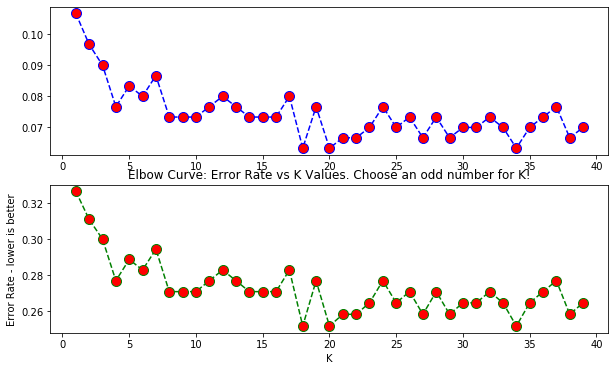

In [12]:
# can we improve the model easily = yes use the optimal K neighbors
# run through all the k options from 1 to 40 to see which is optimal

error_rate = [] # mean error drop zero
error_rate2 = [] # root mean squared error

# run through different k values
# i use two different error calcs but you can use the one you like
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error1 = np.mean(pred_i != y_test) # average error rate, exclude actual y = prediction to avoid 0 in mean
    error_rate.append(np.mean(error1)) # append to the error_rate[] 
    # print('For k = ', i, ', the error is ', np.round(error1,3))
    error2 = np.sqrt(mean_squared_error(y_test,pred_i)) # calculate Root Mean Squared Error (RMSE)
    error_rate2.append(np.mean(error2)) # append to the error_rate2[] 

# plot the error rate simulations (elbow curve)
fig, ax = plt.subplots(2, 1, figsize=(10,6))
ax[0].plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
ax[1].plot(range(1,40),error_rate2,color='green', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Elbow Curve: Error Rate vs K Values. Choose an odd number for K!')
plt.xlabel('K')
plt.ylabel('Error Rate - lower is better')


In [13]:
# looking at results, higher K is better than lower K to reduce error
# however bumpy error rate is not so good, choose a flatter area
# visually, choose 17

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# on the results, run a classification report and a confusion matrix to see how good the model is
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\nClassification Matrix: ')
print(classification_report(y_test,pred)) # achieved a higher level of precision from 91 to 95

Confusion Matrix: 
[[143  17]
 [  7 133]]

Classification Matrix: 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       160
           1       0.89      0.95      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [14]:
# Another way of choosing k (algorithmically, not the Elbow visualization)
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
#params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
params = {'n_neighbors':np.arange(1,40)}
knn2_reg = neighbors.KNeighborsRegressor()
knn2_class = neighbors.KNeighborsClassifier()

gsmodel = GridSearchCV(knn2_reg, params, cv=5)
gsmodel.fit(X_train,y_train)
gsmodel.best_params_ # model.best_params_['n_neighbors'] = 13 # BEST TO CHOOSE ODD NUMBER FOR K

{'n_neighbors': 16}

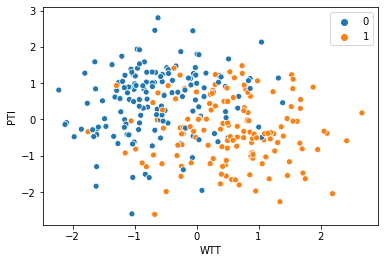

In [15]:
# just two features out of the 10 for visualization purposes
# output test against the new test set (30% of data)
sns.scatterplot(x=X_test['WTT'],y=X_test['PTI'], hue=pred)

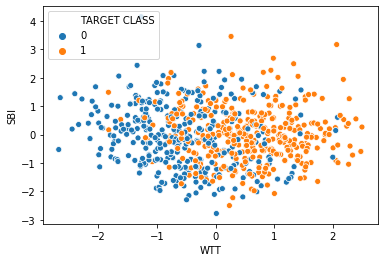

In [16]:
# just two features out of the 10 for visualization purposes
# original training set (70% of data)
sns.scatterplot(x=X_train['WTT'],y=X_train['SBI'], hue=y_train)

"\n\n# Plotting decision regions\nfig, ax = plt.subplots()\n# Decision region for feature 3 = 1.5\nvalue = 1.5\n# Plot training sample with feature 3 = 1.5 +/- 0.75\nwidth = 0.75\nplot_decision_regions(X, y, clf=svm,\n                      filler_feature_values={2: value},\n                      filler_feature_ranges={2: width},\n                      legend=2, ax=ax)\nax.set_xlabel('Feature 1')\nax.set_ylabel('Feature 2')\nax.set_title('Feature 3 = {}'.format(value))\n\n"

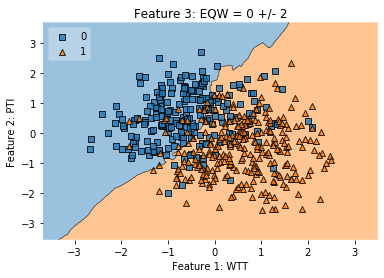

In [17]:
# Plotting decision regions
fig, ax = plt.subplots()

from mlxtend.plotting import plot_decision_regions
value = 0
width = 2
plot_decision_regions(np.array(X_train), np.array(y_train), clf=knn, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 
                                             7: value, 8: value, 9: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 
                                             7: width, 8: width, 9: width},
                      legend=2)

ax.set_xlabel('Feature 1: WTT')
ax.set_ylabel('Feature 2: PTI')
ax.set_title('Feature 3: EQW = {} +/- {}'.format(value, width))

"""

# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=svm,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

"""


In [18]:
# Done

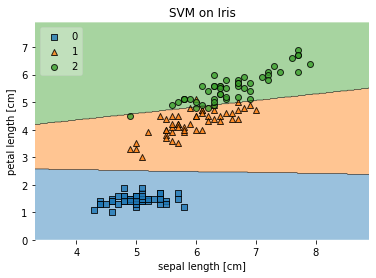

In [19]:
# Plotting using MLXTEND
# Other examples

# pip install mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [20]:
# Another example for KNN, using wine dataset


from sklearn import datasets

# load dataset and explore
wine = datasets.load_wine()
print('Features: ', wine.feature_names)
print('Data Shape: ', wine.data.shape)
# get the 3 different classes
print('Target names: ', wine.target_names)
print('')
# print input set
print('Inputs (Top 5):')
print(wine.data[0:5])
# print output set
print('Outputs:')
print(wine.target)

# split data into training vs test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2) # 80% training and 20% test
print('')
print('Training set shape: ', X_train.shape)
print('Test set shape: ', X_test.shape)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Data Shape:  (178, 13)
Target names:  ['class_0' 'class_1' 'class_2']

Inputs (Top 5):
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
Outputs:
[0 0 0 

In [21]:
# Run model
k = 7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
# Generate model output = prediction based on test data set
y_predict = knn.predict(X_test)

In [23]:
# Model Accuracy
from sklearn import metrics
print("Model Accuracy:", metrics.accuracy_score(y_test, y_predict))

Model Accuracy: 0.6944444444444444


In [24]:
# Try a prediction on your own
x_user_input = [[5,4,1,3,100,1,4,0.3,2,20,1,1,400]]
y_user_output = knn.predict(x_user_input)
print("Class: ", wine.target_names[y_user_output])

Class:  ['class_1']
